In [25]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
%matplotlib inline  

# Lee dataset

In [2]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


# PCA

In [3]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

In [4]:
print(pca.explained_variance_ratio_)
print(X_new.shape)
print(X_new)

[ 0.09677511  0.05886284  0.04549392  0.0336914   0.02658878  0.02501407
  0.02369812  0.02124501  0.01907082  0.01629285  0.01416668  0.01343007
  0.01297935  0.01197357  0.01121607  0.01039287  0.0093623   0.00887111
  0.00817023  0.00741812  0.00722397  0.00699888  0.00679285  0.0063146
  0.00619671  0.00586309  0.0056263   0.00529969  0.00510283  0.00481783
  0.00443306  0.00438451  0.00436362  0.00398348  0.00382861  0.00372676
  0.00355261  0.00351135  0.00331477  0.00327756  0.0031756   0.00308605
  0.00301297  0.00291429  0.00284045  0.00273841  0.00262855  0.00260947
  0.00257284  0.00252117]
(4214, 50)
[[ 107.86096449  106.96748849  173.17571538 ...,  -13.43378077
    43.31229665   31.71410007]
 [ -20.16786548  -56.97777189 -142.40258096 ...,  -16.76235582  -17.0767526
   -10.2676351 ]
 [ 230.29590346  136.36689034  110.9021059  ...,   -3.30379242
     7.37028413   17.84793259]
 ..., 
 [  32.55423293   24.75614384  -77.3263594  ...,  -11.64878883
    -3.47660271   -4.80827396

In [5]:
X_backup = X_new

# KMeans

In [6]:

k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    silavg += [silhouette_avg]
print(silavg)
#Silhoutte Score 

[0.057339202982474691, 0.057134237766366384, 0.049590355773687006]


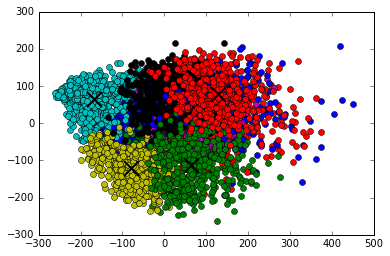

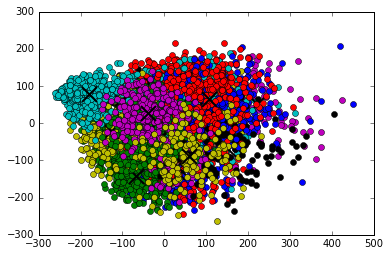

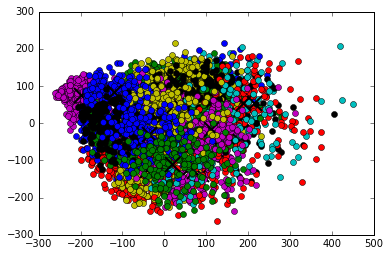

In [7]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        # select only data observations with cluster label == i
        ds = X_new[np.where(labels[n]==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    n += 1
    plt.show()

In [8]:
for cen in labels:
    c = 0
    for cent in cen:
        c+=1
    print(c)
print(labels)
print(centroids)

4214
4214
4214
[array([4, 1, 7, ..., 6, 1, 1]), array([16, 19,  7, ..., 14, 19, 19]), array([20,  5, 24, ..., 12, 28, 16])]
[array([[ -6.36231951e+01,   1.23780782e+00,   3.99570222e+01,
          2.49977364e+01,   1.76576850e+01,  -1.21781378e+00,
         -2.76210526e+01,   3.97443667e+00,  -9.76608643e+00,
          8.27718484e+00,  -2.76747363e+00,   1.23865266e+01,
         -1.47668773e+00,   4.18920625e+00,  -7.09021633e+00,
          4.47761934e+00,   3.17855290e+00,  -6.09166330e+00,
         -5.77722014e+00,  -4.81512523e+00,  -9.55100417e-01,
          1.64301700e+00,  -1.77794442e+00,   1.79180344e+00,
          6.89096460e+00,  -2.48052714e+00,   5.76119026e+00,
          5.96851276e-01,   7.81384362e-01,  -7.15130443e-01,
          4.03057198e+00,   1.21503093e+00,  -2.34364205e+00,
         -3.30416063e-01,  -2.35399335e+00,  -1.72946565e+00,
          1.62996220e+00,  -2.91796266e+00,  -1.16510866e+00,
         -3.96715107e+00,  -2.31777769e+00,   4.57427246e+00,
       

# MeanShift

In [9]:
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)
print(labels_ms)
print(bandwidth)

12
[0 0 0 ..., 0 0 0]
369.451479281


In [10]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)

0.212512637352


IndexError: index 12 is out of bounds for axis 0 with size 12

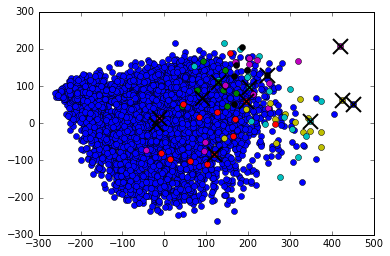

In [12]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_new[np.where(labels_ms==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(cluster_centers_ms[i,0],cluster_centers_ms[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

# DBSCAN

In [100]:
db = DBSCAN(eps = 100, min_samples = 4).fit(X_new)
db1 = DBSCAN(eps = 270, min_samples = 3).fit(X_new)
db2 = DBSCAN(eps = 300, min_samples = 2).fit(X_new)
dblabels = db.labels_
dblabels1 = db1.labels_
dblabels2 = db2.labels_

n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_clusters_1 = len(set(dblabels1)) - (1 if -1 in dblabels1 else 0)
n_clusters_2 = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 3
Estimated number of clusters: 8
Estimated number of clusters: 14


In [101]:
print(silhouette_score(X_new, dblabels))
print(silhouette_score(X_new, dblabels1))
print(silhouette_score(X_new, dblabels2))

-0.113450068858
0.0947513233432
0.134215081461


In [102]:
np.set_printoptions(threshold=np.inf)
print(dblabels)
print(dblabels1)
print(dblabels2)

[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

In [26]:
X_backup = X_new

In [31]:
modelo = TSNE(n_components = 2, perplexity = 50)
np.set_printoptions(suppress=True)
t_sne=modelo.fit_transform(X_backup)

In [32]:
print(t_sne)

[[  7.9826987    0.02603075]
 [ -3.88950171  -8.93450379]
 [  6.87114899   0.55154092]
 [ -9.06761804   3.06341062]
 [ -2.70909144  -3.2812533 ]
 [-13.64160754   5.04003395]
 [  3.73503368   4.06891139]
 [  5.78859656  -2.6899948 ]
 [  6.95884497  -2.68738918]
 [  6.34609334   0.22298303]
 [  2.64221965   5.94696682]
 [  7.09155528   3.45021755]
 [  0.14812056   9.66486737]
 [ 10.51530848   2.74764755]
 [  0.39605681   0.48196862]
 [ -0.06944589   5.92799997]
 [ -5.89161667   3.87119232]
 [  1.54682547  -3.89003165]
 [  1.76923286  -2.87133769]
 [  5.94552212  -9.36250024]
 [ -1.77670946  -1.15914258]
 [ -2.20217076   7.33883989]
 [  6.15033646   0.22616299]
 [  1.0467074    6.73340486]
 [ -1.12342432   8.76503818]
 [  2.89888551   3.63230307]
 [  2.10306612  -2.0346166 ]
 [ -2.03121179  -1.47321724]
 [  2.16648995  -3.7927558 ]
 [  2.80240633   0.41554368]
 [  2.11768843  -0.12032613]
 [  1.90267562  -0.48324039]
 [  1.14095253   0.24903883]
 [ -4.85378971   9.71495877]
 [ -1.72426789

# T-SNE

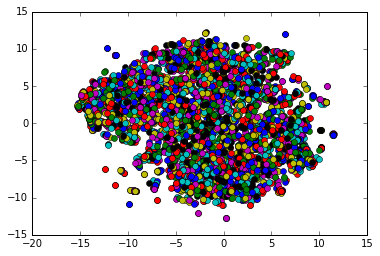

In [35]:
for i in t_sne:
    plt.plot(i[0], i[1], 'o')

# CSV

In [74]:
ids = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        ids.append(int(line[id_start+1:id_end]))
        
x = []
y = []
for t in t_sne:
    x.append(t[0])
    y.append(t[1])


DataSet = list(zip(ids, x, y))
df = pd.DataFrame(data = DataSet, columns=['Id', 'x', 'y'])
df
df.to_csv('datas.csv',index=False,header=False)